# DRILL - Exercises in Probability

1. Calculate the probability of flipping a balanced coin four times and getting each pattern: HTTH, HHHH and TTHH.

In [2]:
# for any given pattern it is 1/(2^4).

2. If a list of people has 24 women and 21 men, then the probability of choosing a man from the list is 21/45. What is the probability of not choosing a man?

In [3]:
# not choosing a man is equal to choosing a woman (since they are the only choices), which is 24/45.

3. The probability that Bernice will travel by plane sometime in the next year is 10%. The probability of a plane crash at any time is .005%. What is the probability that Bernice will be in a plane crash sometime in the next year?

In [4]:
# The two events (the traveling and the plane crash) seems to be independent, so it is (1/10)*(5/100000) = 5x10^-4%

4. A data scientist wants to study the behavior of users on the company website. Each time a user clicks on a link on the website, there is a 5% chance that the user will be asked to complete a short survey about their behavior on the website. The data scientist uses the survey data to conclude that, on average, users spend 15 minutes surfing the company website before moving on to other things. What is wrong with this conclusion?

In [5]:
# the survey data is not from independent users, since a person may click on multiple links and thus gets to fill the survey more than once.

A diagnostic test has a 98% probability of giving a positive result when applied to a person suffering from Thripshaw's Disease, and 10% probability of giving a (false) positive when applied to a non-sufferer. It is estimated that 0.5 % of the population are sufferers. Suppose that the test is now administered to a person whose disease status is unknown. Calculate the probability that the test will:

1. Be positive
2. Correctly diagnose a sufferer of Thripshaw's
3. Correctly identify a non-sufferer of Thripshaw's
4. Misclassify the person

In [6]:
# lets define pos/neg as the results of the test and +/- as the true situation:
# P[pos | +] = .98
# P[pos | -] = .1
# P[+] = .005
# P[-] = .995

# 1. P[pos] = P[pos | +] * P[+] + P[pos | -] * P[-] = .98 * .995 + .1 * .005
# 2. P[?]
# 3. P[?]
# 4. P[pos | -] * P[-] + P[neg | +] * P[+] = .1 * .995 + (1-.98) * .005

In [38]:
import numpy as np
import scipy as sp
from scipy.stats import ttest_ind


import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
s = 100
chisq = np.random.chisquare(2, size=s)
nonc_chisq = np.random.noncentral_chisquare(2, 1, size=s)
lognorm = np.random.lognormal(mean=0.5, sigma=1.5, size=s)
rayleigh = np.random.rayleigh(scale=1.0, size=s)
std_cauchy = np.random.standard_cauchy(size=s)
wald = np.random.wald(mean = 1., scale = 2., size=s)
neg_binom = np.random.negative_binomial(n=100 , p=.2, size=s)
dists = {'chisq': chisq, 'nonc_chisq': nonc_chisq, 'lognorm': lognorm, 'rayleigh': rayleigh, 'std_cauchy': std_cauchy, 
         'wald': wald, 'neg_binom': neg_binom}

chisq


nonc_chisq


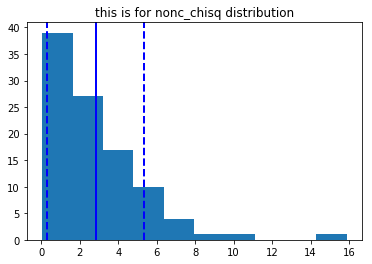

lognorm


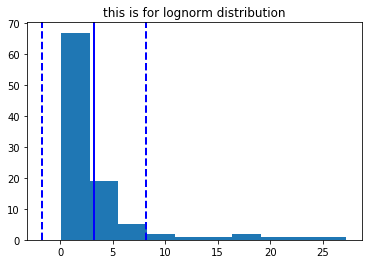

rayleigh


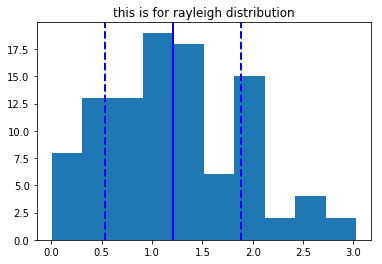

std_cauchy


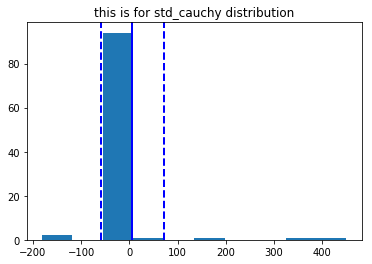

wald


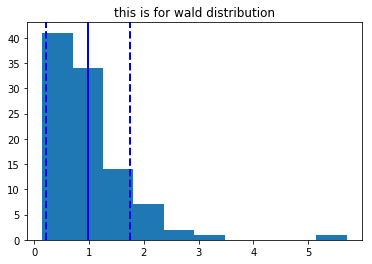

neg_binom


In [27]:
for name, dist in dists.items():
    print(name)
    plt.hist(dist)
    plt.axvline(dist.mean(), color='b', linestyle='solid', linewidth=2)
    plt.axvline(dist.mean() +  dist.std(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(dist.mean() -  dist.std(), color='b', linestyle='dashed', linewidth=2)
    plt.title('this is for {} distribution'.format(name))
    plt.show()

In [31]:
norm1 = np.random.normal(loc=5.0, scale=.5, size=100*s)
norm2 = np.random.normal(loc=10.0, scale=1.0, size=100*s)
norm3 = norm1 + norm2
plt.hist(norm3, bins=20)
plt.axvline(norm3.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(norm3.mean()+norm3.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(norm3.mean()-norm3.std(), color='b', linestyle='dashed', linewidth=2)
plt.title('this is for sum of two normal distributions')
plt.show()

In [34]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

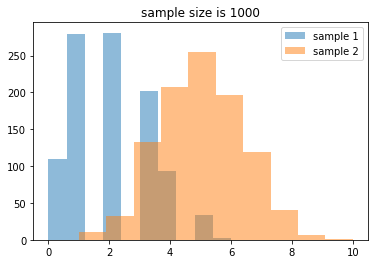

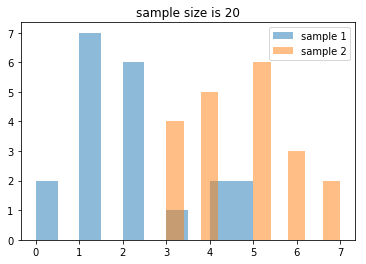

In [41]:
sample1_a = np.random.choice(pop1, 1000, replace=True)
sample2_a = np.random.choice(pop2, 1000, replace=True)
sample1_b = np.random.choice(pop1, 20, replace=True)
sample2_b = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1_a, alpha=0.5, label='sample 1') 
plt.hist(sample2_a, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.title('sample size is 1000')
plt.show()
plt.hist(sample1_b, alpha=0.5, label='sample 1') 
plt.hist(sample2_b, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.title('sample size is 20')
plt.show()

In [43]:
print('for sample set 1000, the first sample mean is {0} and its standard deviation is {1}'.format(
    sample1_a.mean(),sample1_a.std()))
print('for sample set 1000, the second sample mean is {0} and its standard deviation is {1}'.format(
    sample2_a.mean(),sample2_a.std()))
print('for sample set 20, the first sample mean is {0} and its standard deviation is {1}'.format(
    sample1_b.mean(),sample1_b.std()))
print('for sample set 20, the second sample mean is {0} and its standard deviation is {1}'.format(
    sample2_b.mean(),sample2_b.std()))

# Compute the difference between the two sample means.
diff_a=sample2_a.mean( ) -sample1_a.mean()
diff_b=sample2_b.mean( ) -sample1_b.mean()
print(diff_a)
print(diff_b)

size_a = np.array([len(sample1_a), len(sample2_a)])
sd_a = np.array([sample1_a.std(), sample2_a.std()])
size_b = np.array([len(sample1_b), len(sample2_b)])
sd_b = np.array([sample1_b.std(), sample2_b.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se_a = (sum(sd_a ** 2 / size_a)) ** 0.5  
diff_se_b = (sum(sd_b ** 2 / size_b)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print('sample size of 1000')
print(diff_a/diff_se_a)
print(sp.stats.ttest_ind(sample2_a, sample1_a, equal_var=False))
print('sample size of 20')
print(diff_b/diff_se_b)
print(sp.stats.ttest_ind(sample2_b, sample1_b, equal_var=False))

for sample set 1000, the first sample mean is 2.002 and its standard deviation is 1.2782785298987072
for sample set 1000, the second sample mean is 4.977 and its standard deviation is 1.532472185718227
for sample set 20, the first sample mean is 2.0 and its standard deviation is 1.449137674618944
for sample set 20, the second sample mean is 4.7 and its standard deviation is 1.2288205727444508
2.9750000000000005
2.7
sample size of 1000
47.14231193065279
Ttest_indResult(statistic=47.118734878950235, pvalue=2e-323)
sample size of 20
6.355140567630982
Ttest_indResult(statistic=6.194224814505168, pvalue=3.423998437533185e-07)
